# **1. Install Dependencies**

In [1]:
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# for ignore the Warnings
import warnings
warnings.filterwarnings("ignore")

# **2. Import the Datasets**

In [2]:
df = pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# **3. Undestanding The Data**

In [3]:
# showing 10 random samples
df.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
499,33,No,Travel_Rarely,1216,Sales,8,4,Marketing,1,677,...,4,80,0,6,3,3,5,0,1,2
264,28,Yes,Travel_Rarely,529,Research & Development,2,4,Life Sciences,1,364,...,3,80,0,5,5,1,0,0,0,0
1300,34,No,Travel_Rarely,810,Sales,8,2,Technical Degree,1,1823,...,3,80,2,10,5,3,10,8,4,8
89,46,Yes,Travel_Rarely,669,Sales,9,2,Medical,1,118,...,4,80,0,9,3,3,9,8,4,7
1302,35,No,Travel_Rarely,185,Research & Development,23,4,Medical,1,1826,...,2,80,1,6,2,4,5,4,0,3
550,23,No,Travel_Rarely,650,Research & Development,9,1,Medical,1,758,...,4,80,1,5,2,4,4,3,0,2
980,31,Yes,Travel_Frequently,703,Sales,2,3,Life Sciences,1,1379,...,3,80,0,3,3,4,1,0,0,0
140,32,Yes,Travel_Rarely,1033,Research & Development,9,3,Medical,1,190,...,1,80,0,10,2,4,5,4,0,4
700,58,Yes,Travel_Rarely,289,Research & Development,2,3,Technical Degree,1,977,...,1,80,0,7,4,3,1,0,0,0
582,40,No,Travel_Frequently,791,Research & Development,2,2,Medical,1,807,...,4,80,1,8,2,3,8,7,3,7


* Target column is Attrition in this dataset

In [4]:
# shape of the data
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# columns present in the data
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
# numerical data presnt in the dataset
num_data = df.select_dtypes(include=["int64","float64"])
print("numerical columns: ",num_data.columns)

numerical columns:  Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [9]:
# categorical data present in the dataset
cat_data = df.select_dtypes(include=['object'])
print("categorical columns: ",cat_data.columns)

categorical columns:  Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [10]:
for i in cat_data:
    print(i,df[i].unique())
    print(df[i].value_counts())
    print("***************************")

Attrition ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
***************************
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
***************************
Department ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
***************************
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
***************************
Gender ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
***************************
JobRole ['Sales Executive' 'Research Scientist' 'Laboratory

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


## insights:


1. **Age Distribution**: The average age of employees in the dataset is approximately 36.9 years, with a standard deviation of 9.14. The ages range from 18 to 60 years, with the majority falling between 30 and 43 years old.

2. **Daily Rate**: The average daily rate is around $802.49, with a standard deviation of $403.51. Daily rates vary widely, ranging from $102 to $1499.

3. **Distance From Home**: On average, employees live approximately 9.19 units of distance from their workplace, with a standard deviation of 8.11. The distance ranges from 1 to 29 units.

4. **Education Level**: The average education level is 2.91, indicating that most employees have completed some college or technical training. Education levels range from 1 (high school) to 5 (doctorate).

5. **Monthly Income**: The average monthly income is $6502.93, with a significant standard deviation of $4707.96. Monthly incomes vary widely, ranging from $1009 to $19999.

6. **Job Satisfaction and Engagement**: Employees generally report moderate levels of job satisfaction and engagement. The average scores for job satisfaction, environment satisfaction, job involvement, and relationship satisfaction are around 2.72 to 2.73, on a scale of 1 to 4.

7. **Job Level and Experience**: The average job level is 2.06, indicating that most employees hold mid-level positions. Total working years average around 11.28, with a wide standard deviation of 7.78, suggesting a diverse range of experience levels within the dataset.

8. **Promotions and Managerial Relationships**: On average, employees have been with their current manager for approximately 4.12 years. However, years since the last promotion average only 2.19, indicating potential opportunities for career advancement.



In [12]:
df.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [13]:
# is there any null values present in the dataset
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [14]:
# is there any duplicated values present in the dataset
df.duplicated().sum()

0

# **4. Exploratory Data Analysis**

# 4.1 Univariate Analysis

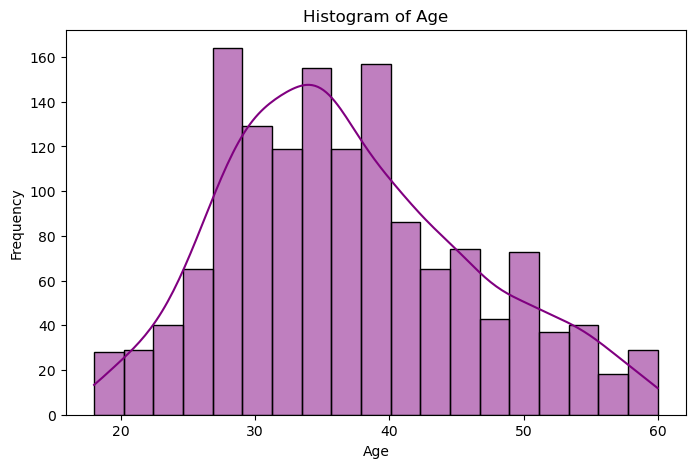

<Figure size 640x480 with 0 Axes>

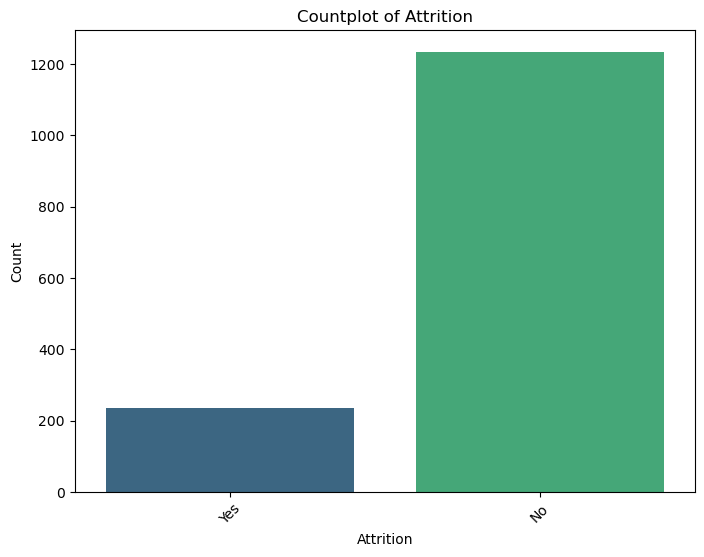

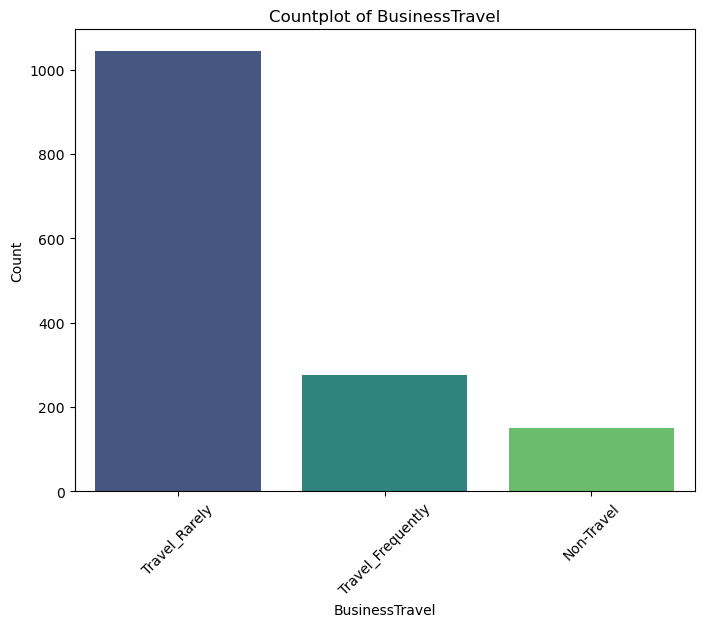

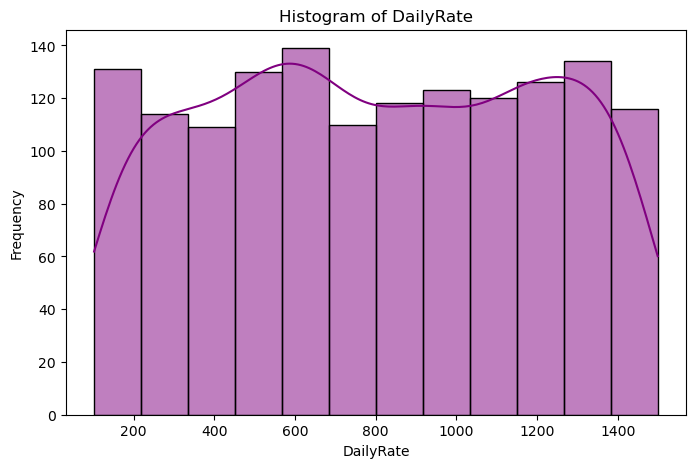

<Figure size 640x480 with 0 Axes>

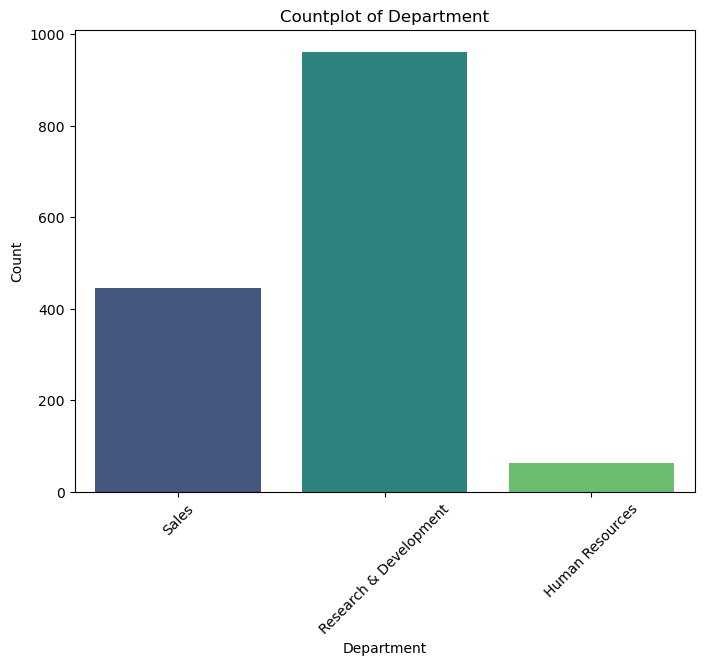

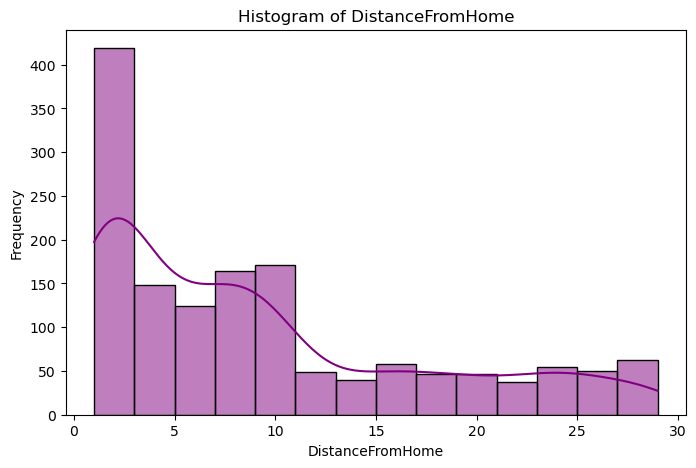

<Figure size 640x480 with 0 Axes>

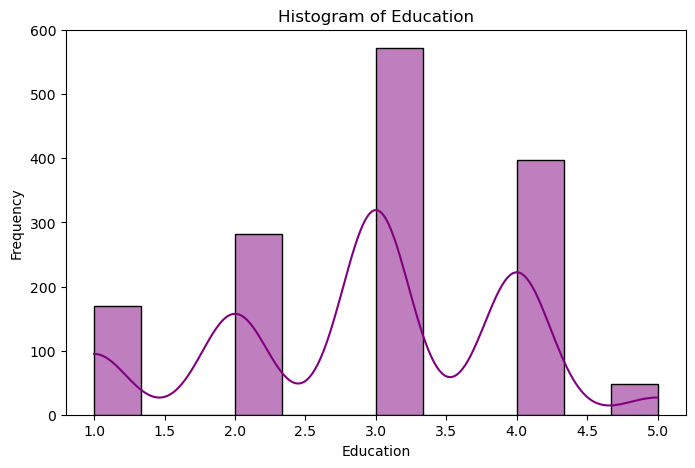

<Figure size 640x480 with 0 Axes>

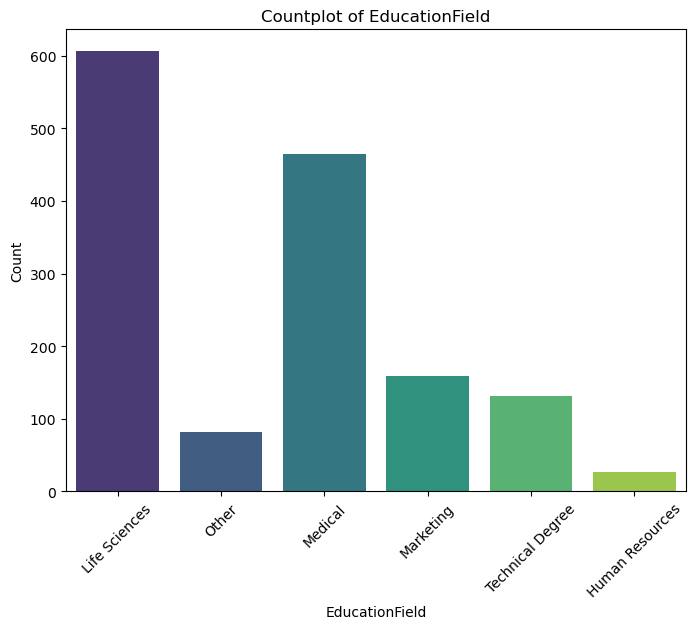

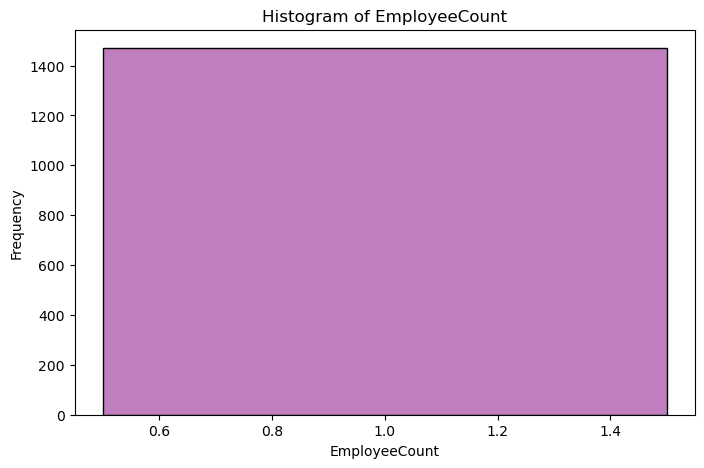

<Figure size 640x480 with 0 Axes>

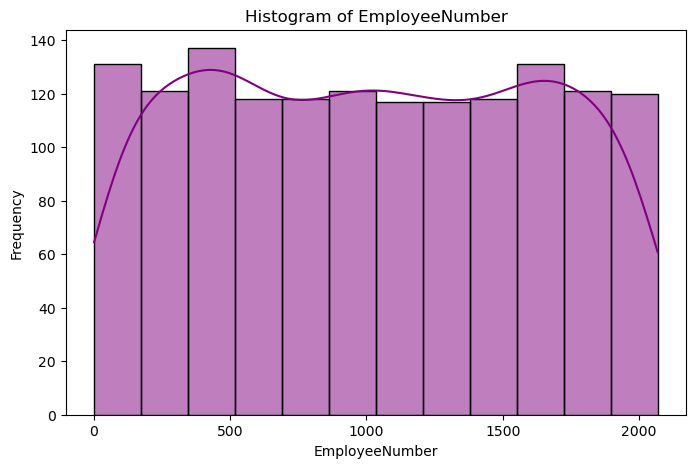

<Figure size 640x480 with 0 Axes>

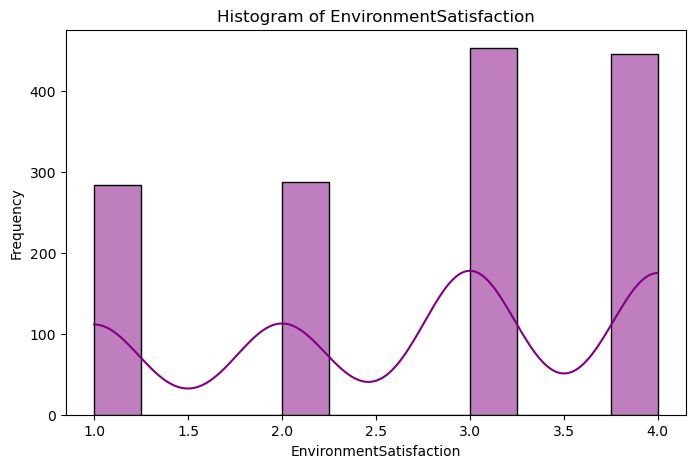

<Figure size 640x480 with 0 Axes>

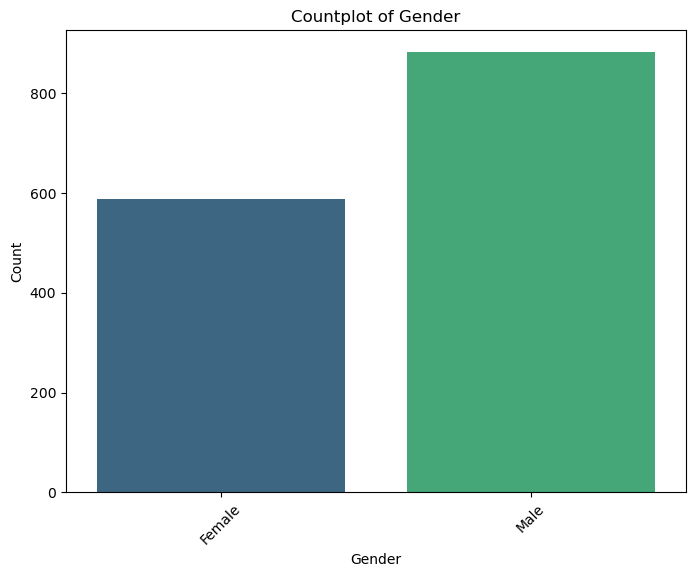

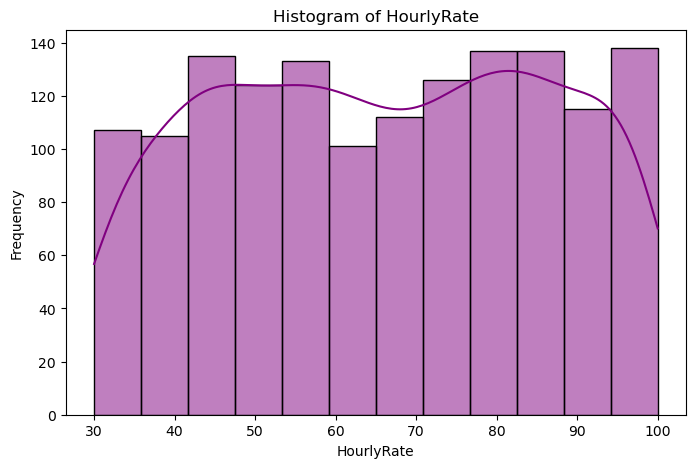

<Figure size 640x480 with 0 Axes>

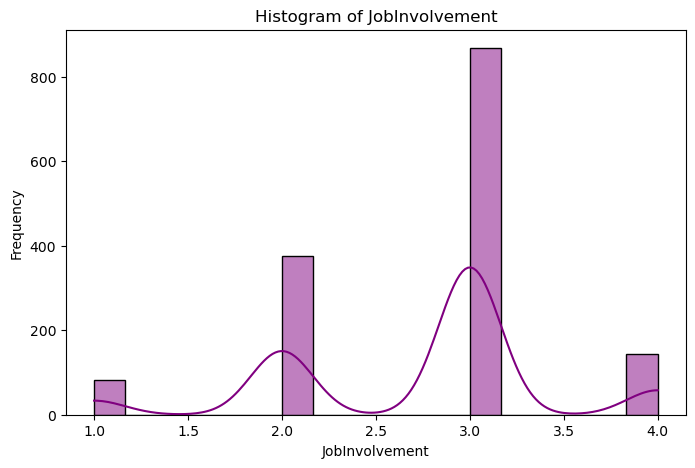

<Figure size 640x480 with 0 Axes>

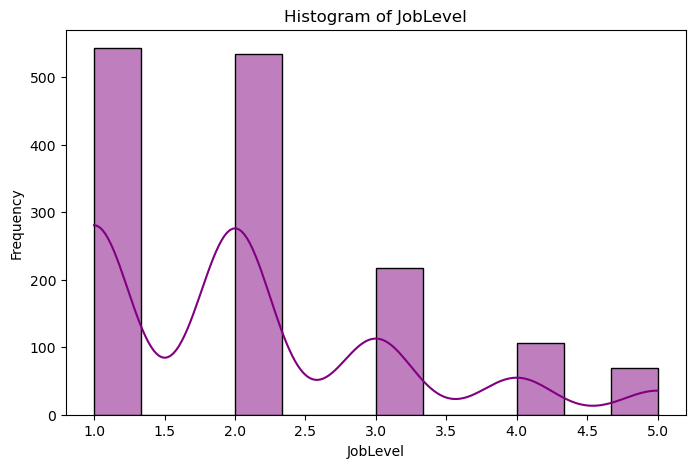

<Figure size 640x480 with 0 Axes>

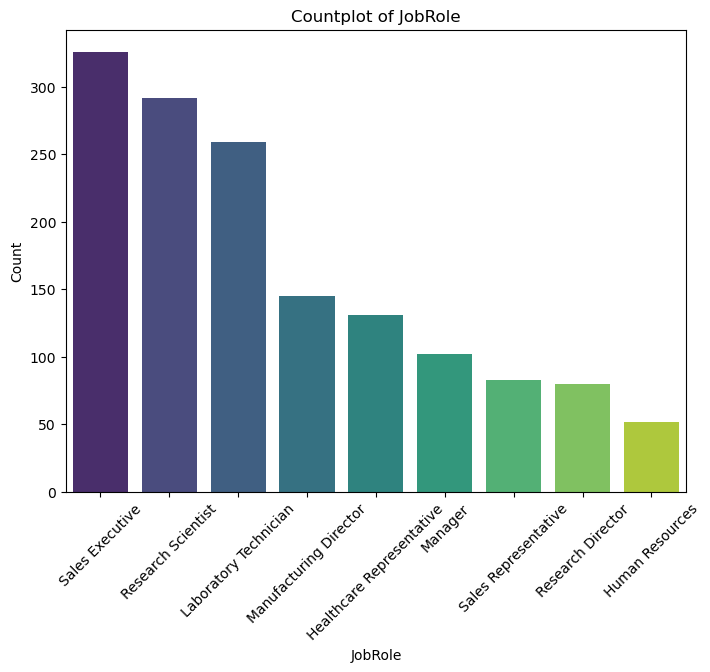

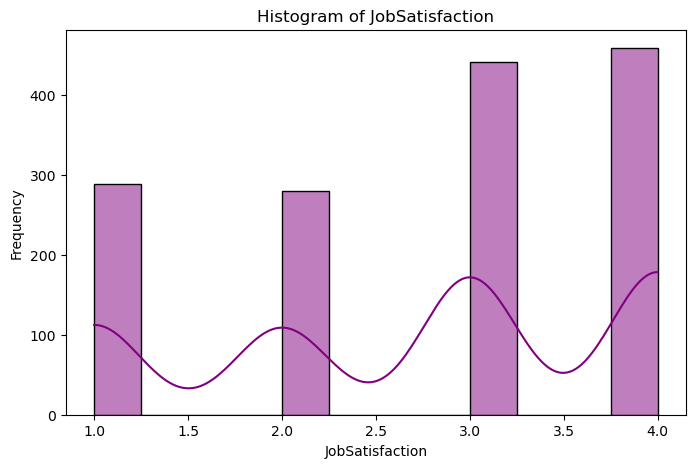

<Figure size 640x480 with 0 Axes>

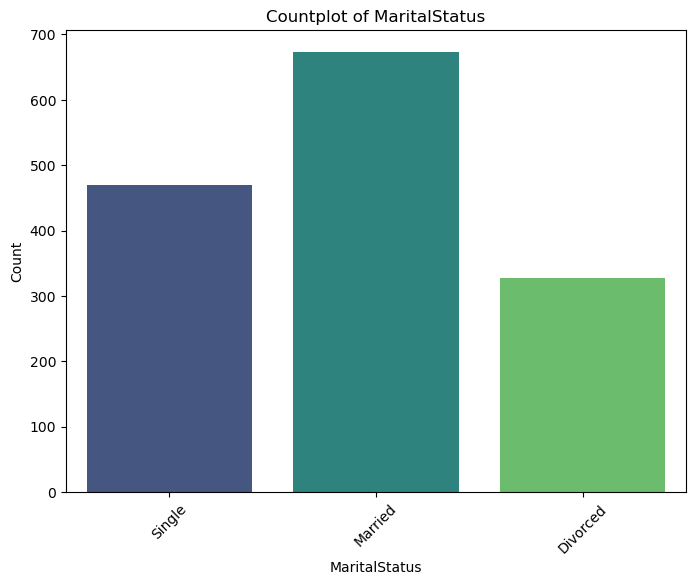

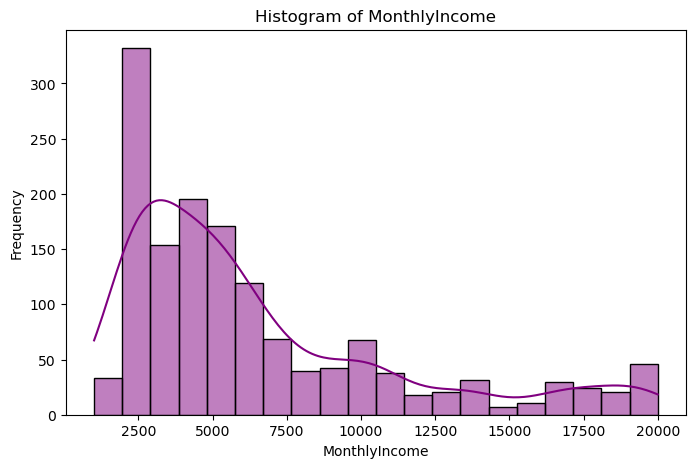

<Figure size 640x480 with 0 Axes>

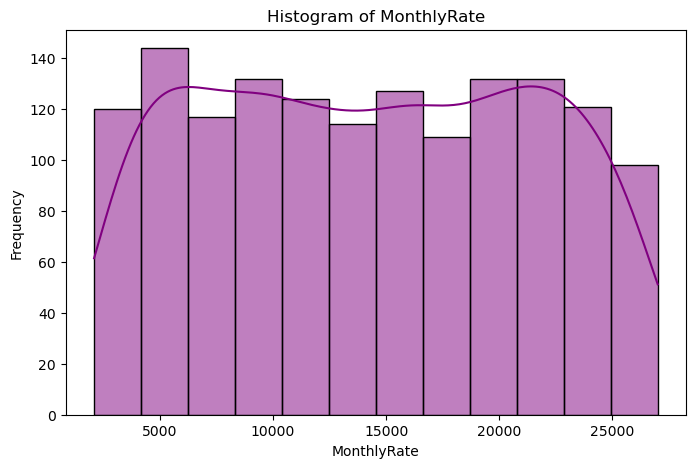

<Figure size 640x480 with 0 Axes>

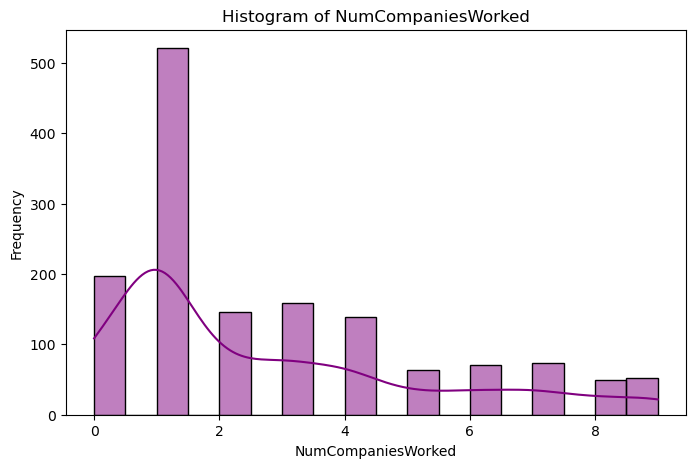

<Figure size 640x480 with 0 Axes>

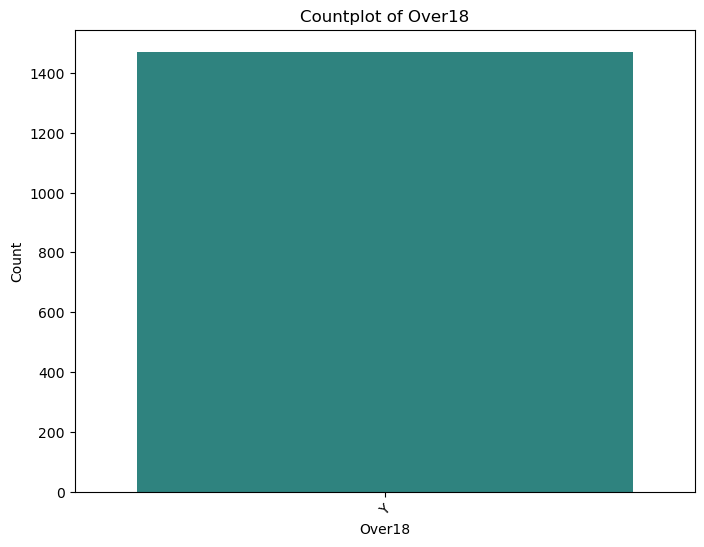

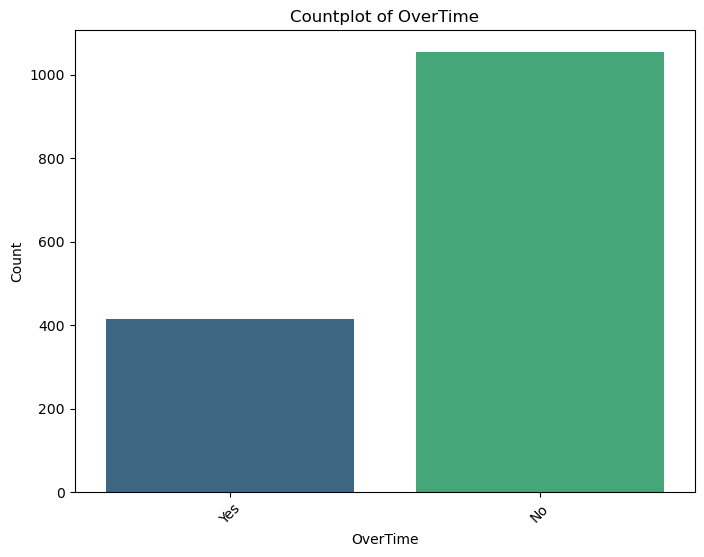

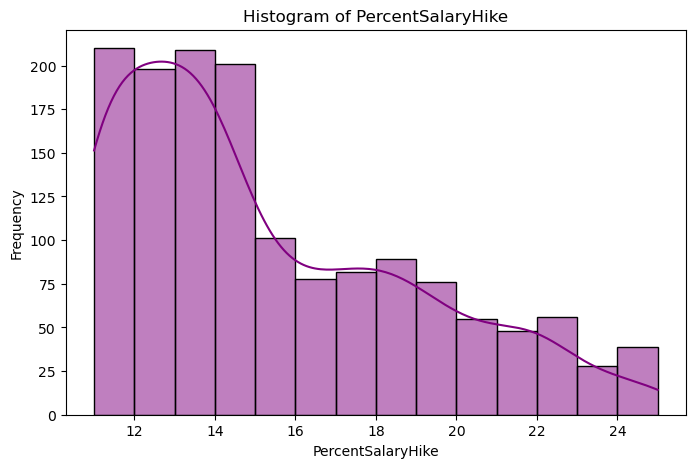

<Figure size 640x480 with 0 Axes>

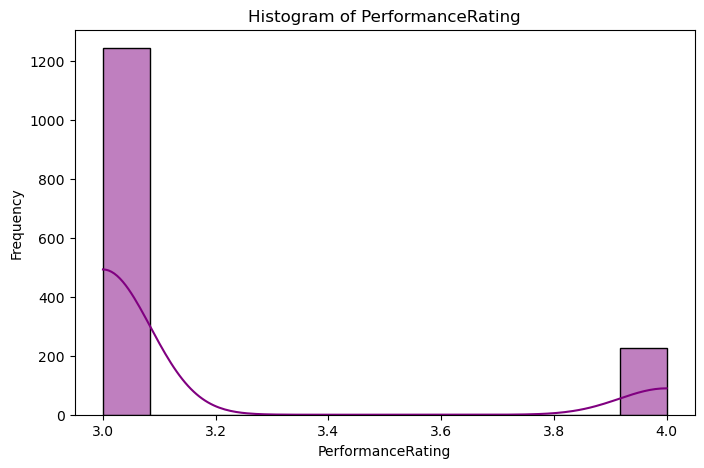

<Figure size 640x480 with 0 Axes>

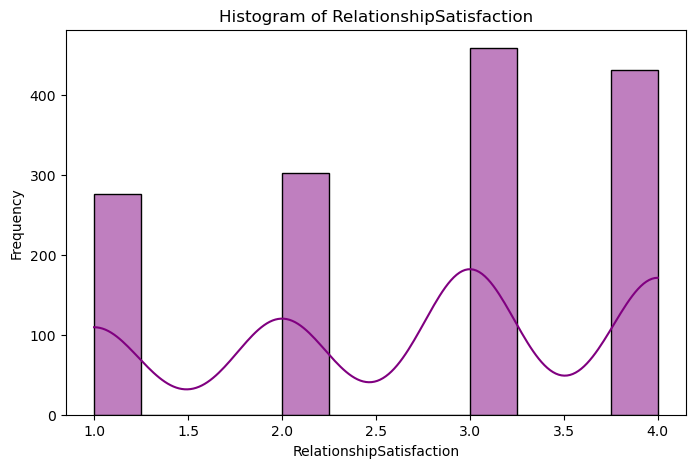

<Figure size 640x480 with 0 Axes>

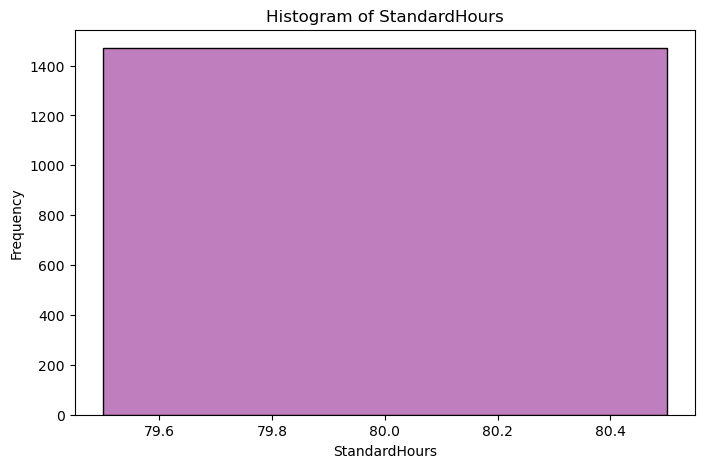

<Figure size 640x480 with 0 Axes>

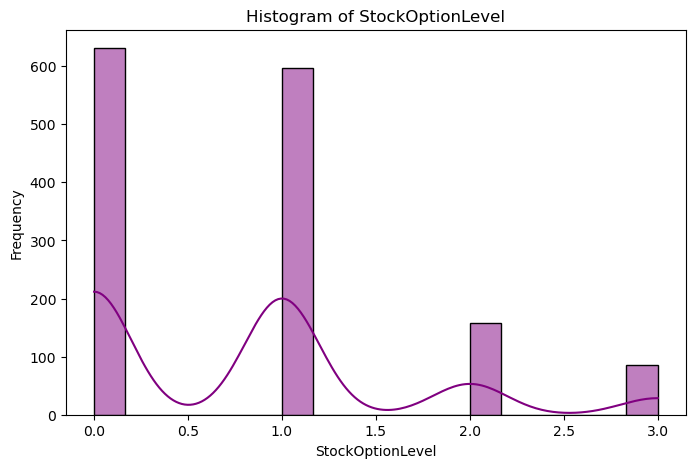

<Figure size 640x480 with 0 Axes>

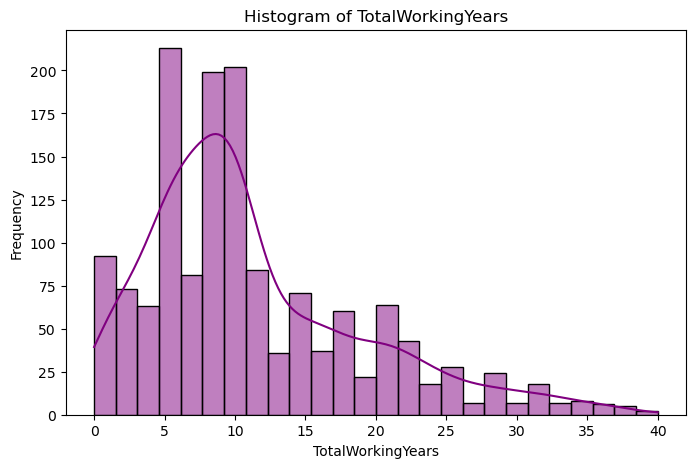

<Figure size 640x480 with 0 Axes>

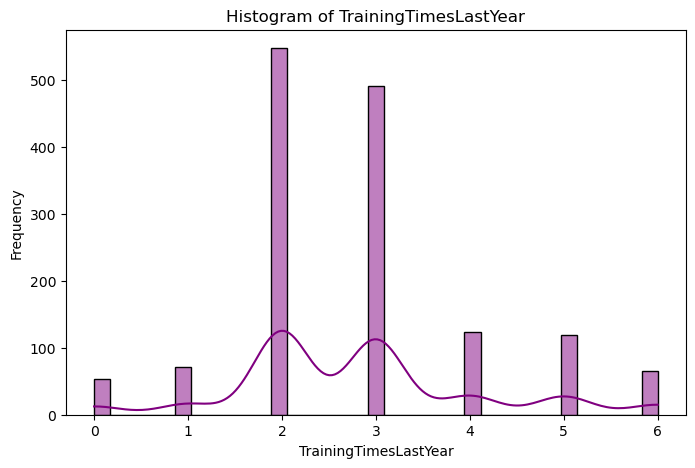

<Figure size 640x480 with 0 Axes>

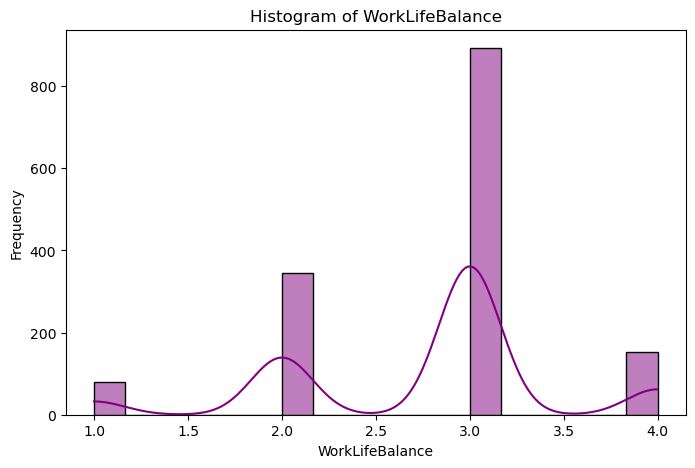

<Figure size 640x480 with 0 Axes>

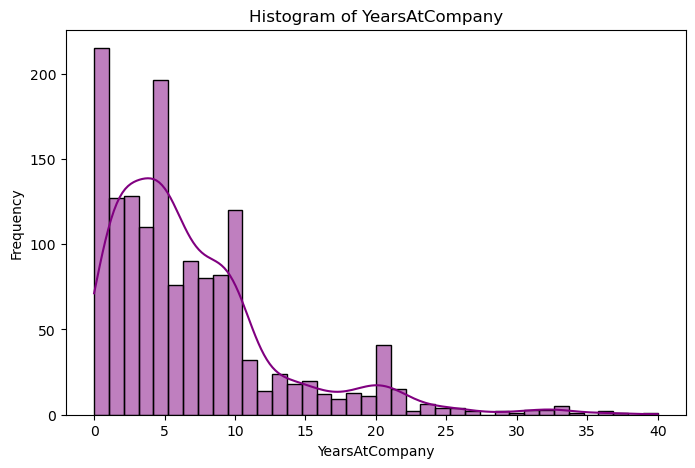

<Figure size 640x480 with 0 Axes>

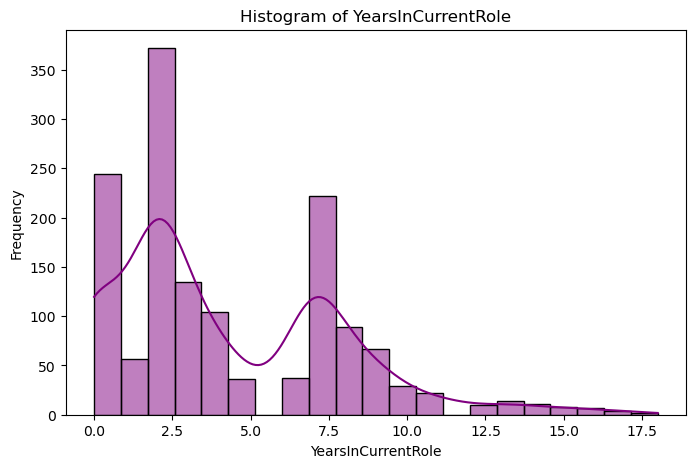

<Figure size 640x480 with 0 Axes>

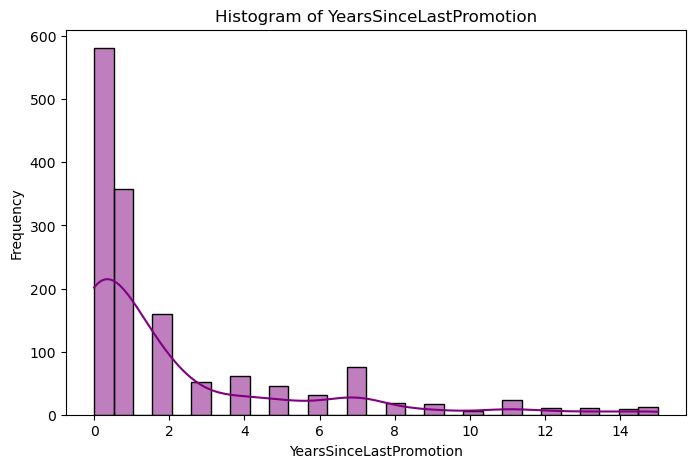

<Figure size 640x480 with 0 Axes>

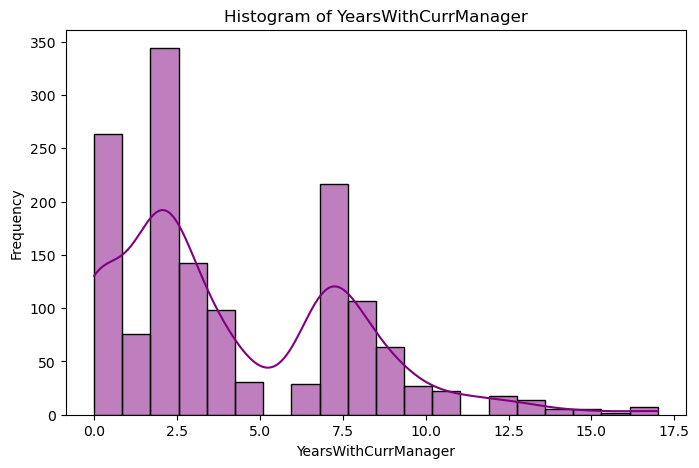

<Figure size 640x480 with 0 Axes>

In [15]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8,5))
        sns.histplot(df[column],kde=True,color='Purple')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
        plt.tight_layout()
    # For categorical columns, plot a countplot
    else:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=column, data=df, palette='viridis')
        plt.title(f'Countplot of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()


In [16]:
import sweetviz as sv

# Analyze the dataset using Sweetviz
my_report = sv.analyze(df)

# Generate and display the HTML report
my_report.show_html()


                                             |                                                                …

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Insights from univariant analysis
* People between the age group 25-40 are the majority.
* 70% of the people travel raraely, 20% travel frequently rest do not travel.
* More than 70% of the employees belong to research and development.
* Almost 50% of the people are nearer to the office i.e the distance from their home is lesser than or equal to 10.
* More than 60% of the people have educational qualification of 4 and 5.
* Majority(40%) of the people are from life science field and 30% are from medical field.
* 60% of the people are almost satisfied with environment condition of the office with more than 3 ratings.
* Gender count: 60% male 40% female.
* 60% of the people have partial involvement in job and 20% have good involvement.
* More than 60% employees seem to be satisfied with their job.
* 50% of the people are married, 30% single and the rest are divorced.
* 60% of the people have less thanm 10k income.
* 40% of the people have worked for less than 1 company which implies they are freshers.
* 30% of the people have worked for more than 5 companies.
* 80% of the people have average work rating.
* 60% of the people have worked for the same company only for 5 years or lesser.
* 80% of the people own only 1 or 0 stock at the company.

# 4.2 Bivariate Analysis

In [17]:
## Create a new dataframe with categorical variables
data1=df[['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']]

In [18]:
data1

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


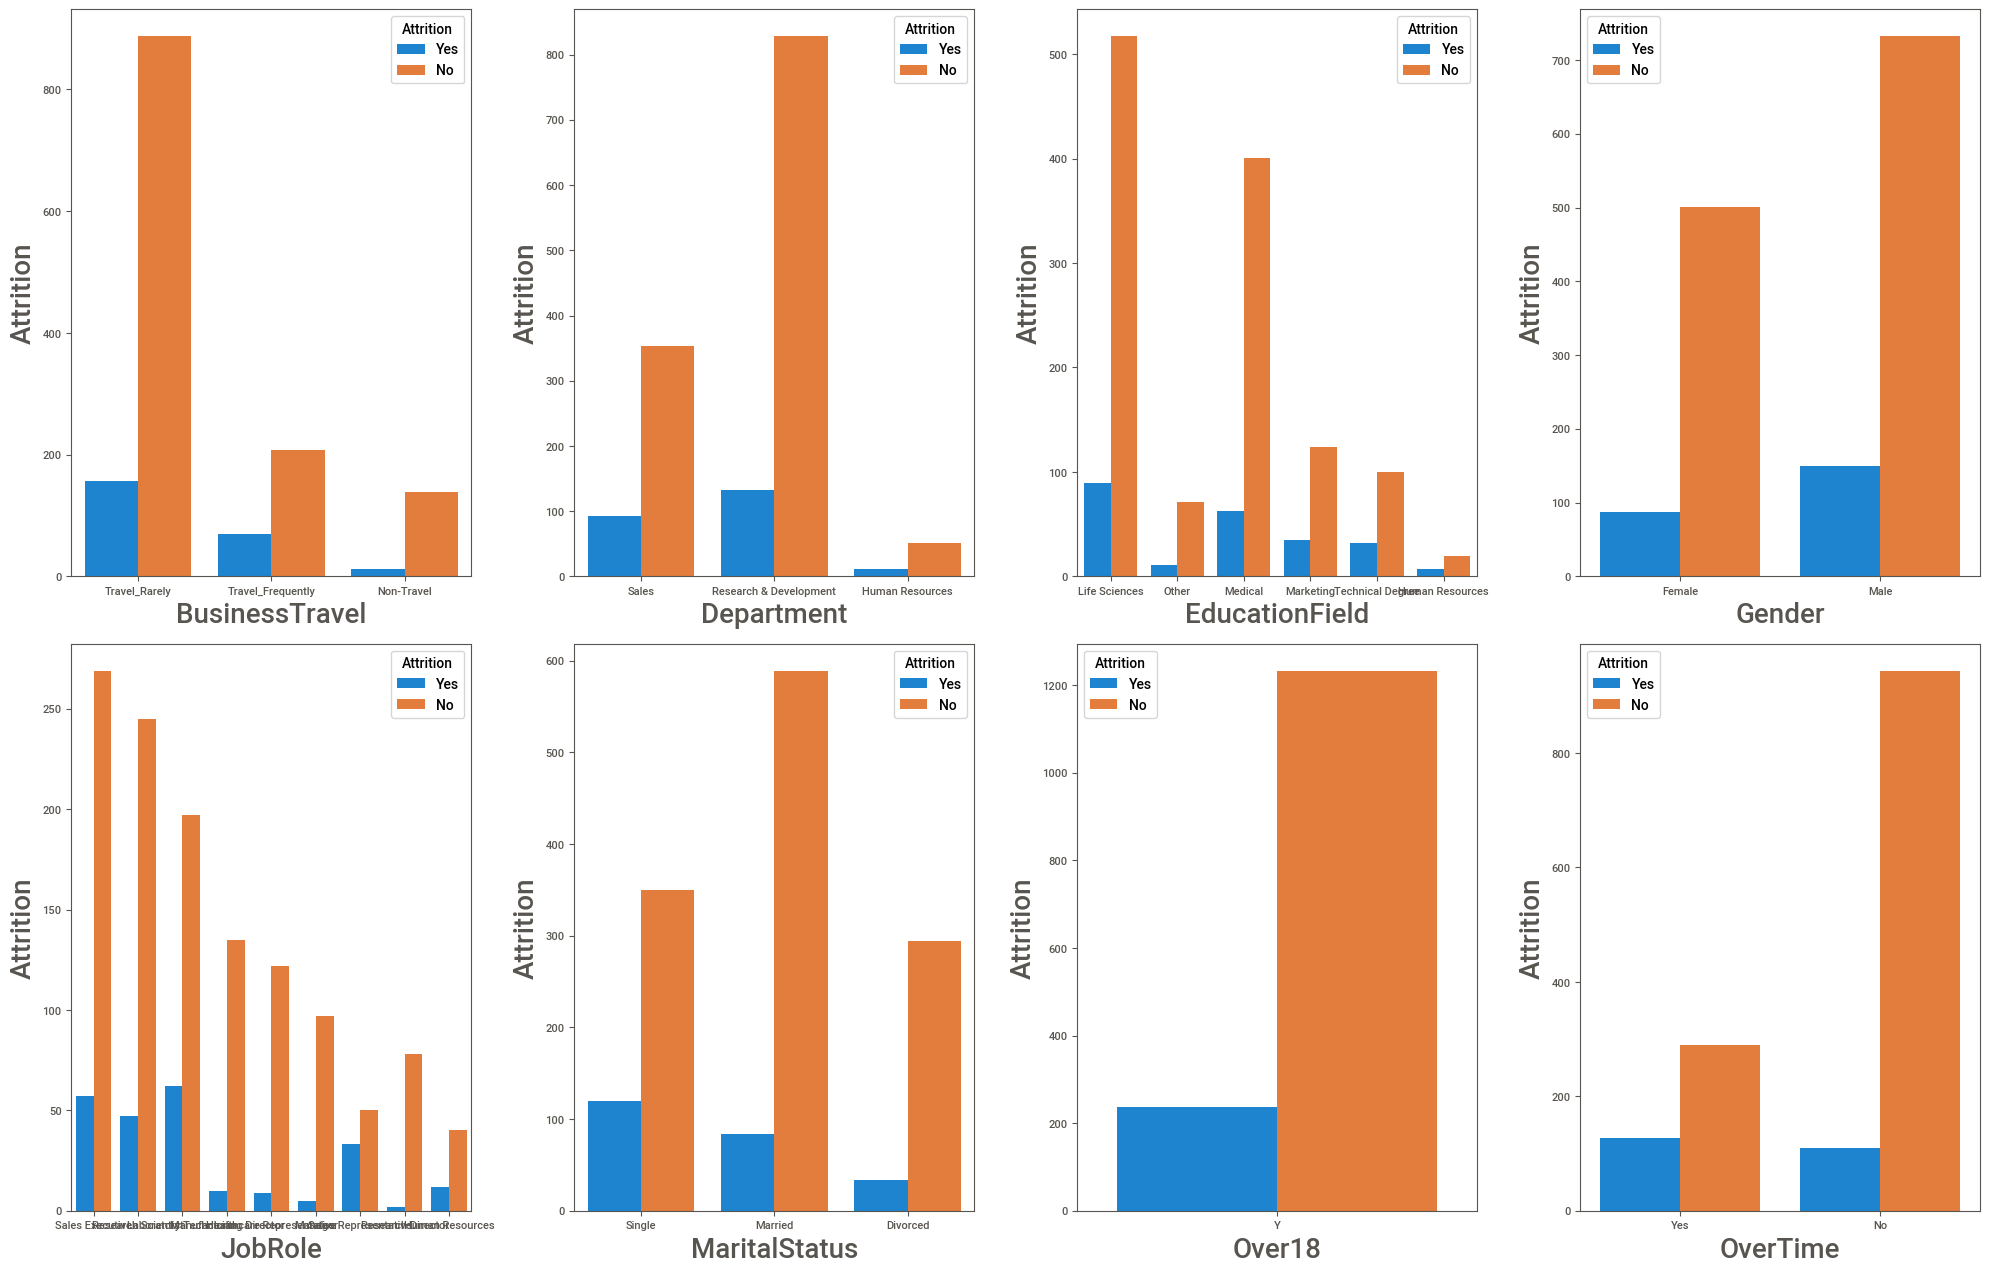

In [19]:
# Plotting how every  categorical feature correlate with the "target"
plt.figure(figsize=(20,25), facecolor='white')#canvas size
plotnumber = 1#count variable

for column in data1:#for loop to acess columns form data1
    if plotnumber<=16 :#checking whether count variable is less than 16 or not
        ax = plt.subplot(4,4,plotnumber)#plotting 8 graphs in canvas(4 rows and 4 columns)
        sns.countplot(x=data1[column]           #plotting count plot
                        ,hue=df.Attrition)
        plt.xlabel(column,fontsize=20)#assigning name to x-axis and increasing it's font
        plt.ylabel('Attrition',fontsize=20)#assigning name to y-axis and increasing it's font
    plotnumber+=1#increasing counter
plt.tight_layout()
plt.show()

## Insights from bivariant analysis
* More male employees are expected to quit their job.
* People who travel more are more expected to leave the job.
* People who do not do overtime do not leave the job.
* Singles are expected to quit the job.
* People from life science and mediacl field are more probably leaving their job.

In [20]:
data2=df[['Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']]#discrete columns

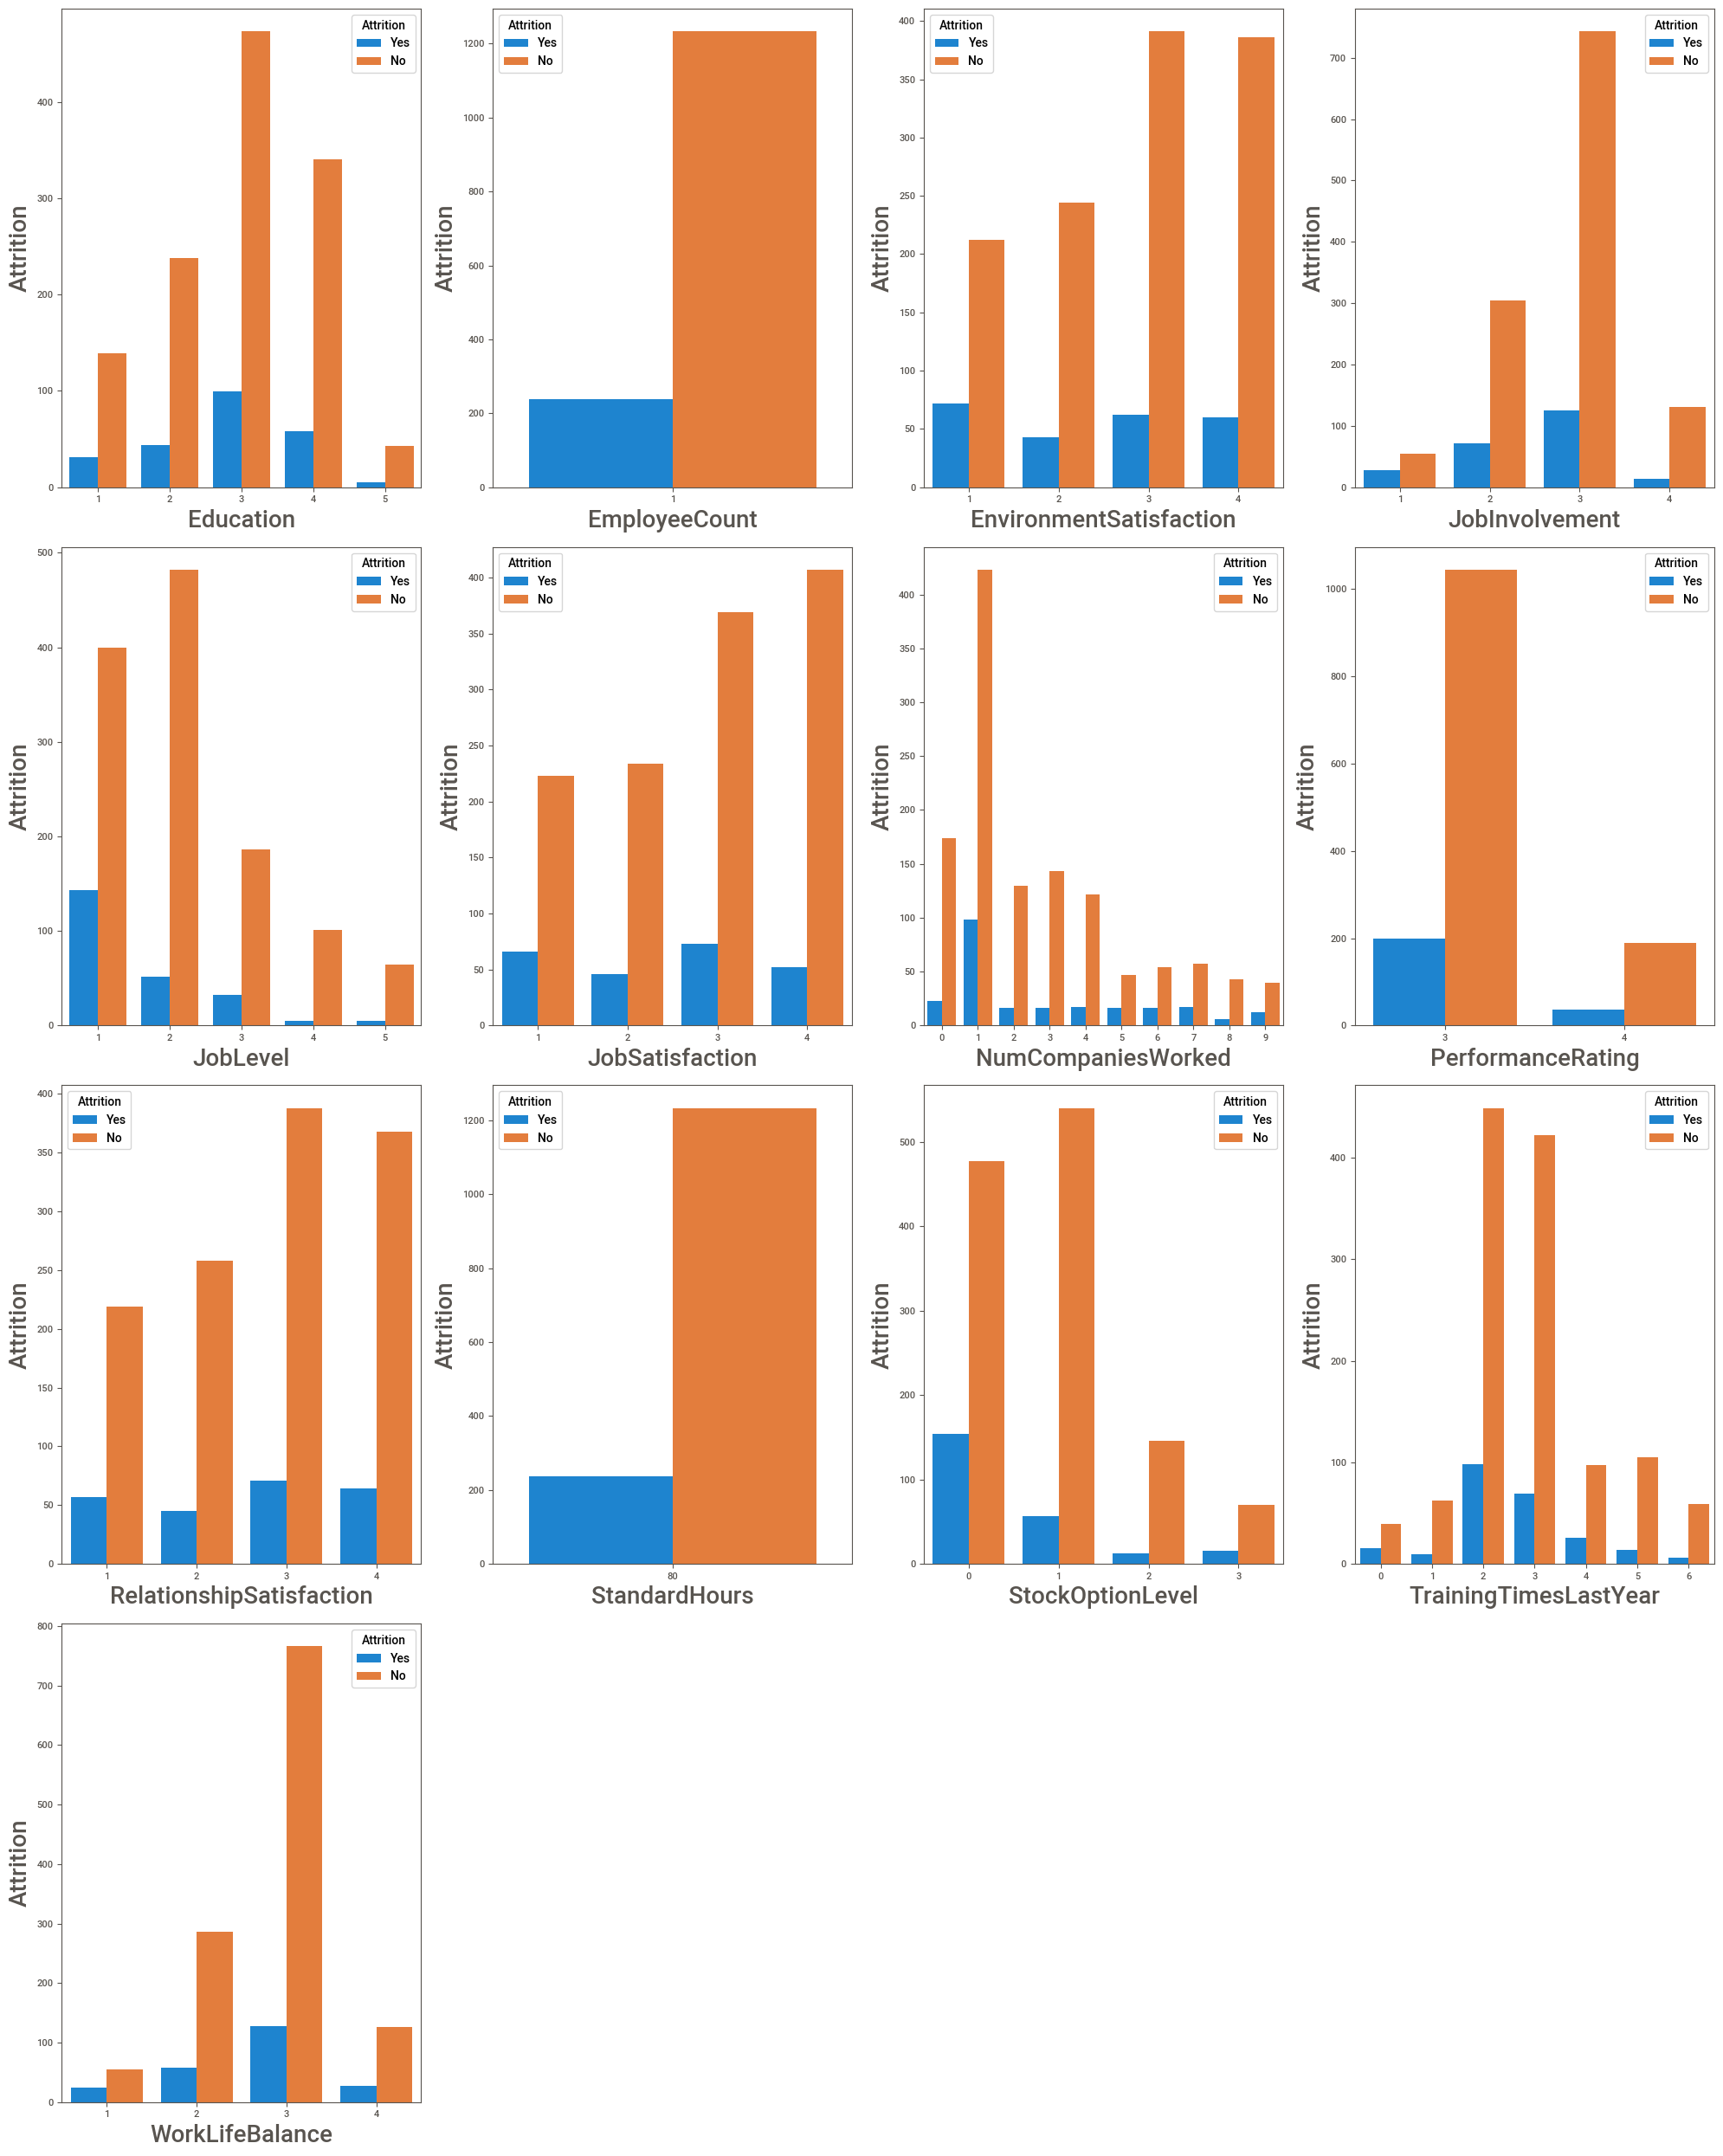

In [21]:
# Plotting how every  discrete feature correlate with the "target"
plt.figure(figsize=(20,25), facecolor='white')#canvas size
plotnumber = 1

for column in data2:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=data2[column]
                        ,hue=df.Attrition)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Attrition',fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Insights:
* If anyone has an EnvironemntSatisfaction is 1 then they probably leave the job and have a score of 2.
* JobInvolvement is 3 has greater probability of leaving the job.
* Job level is less then their higher chances they can leave the job.
* NumCompaniesWorked is 1 then they want to shift company faster than others.
* if the performance rating is less then they will change the job.

## Bivariant analysis of continuous variables

In [22]:
data2=df[['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']]#continuous variables/columns

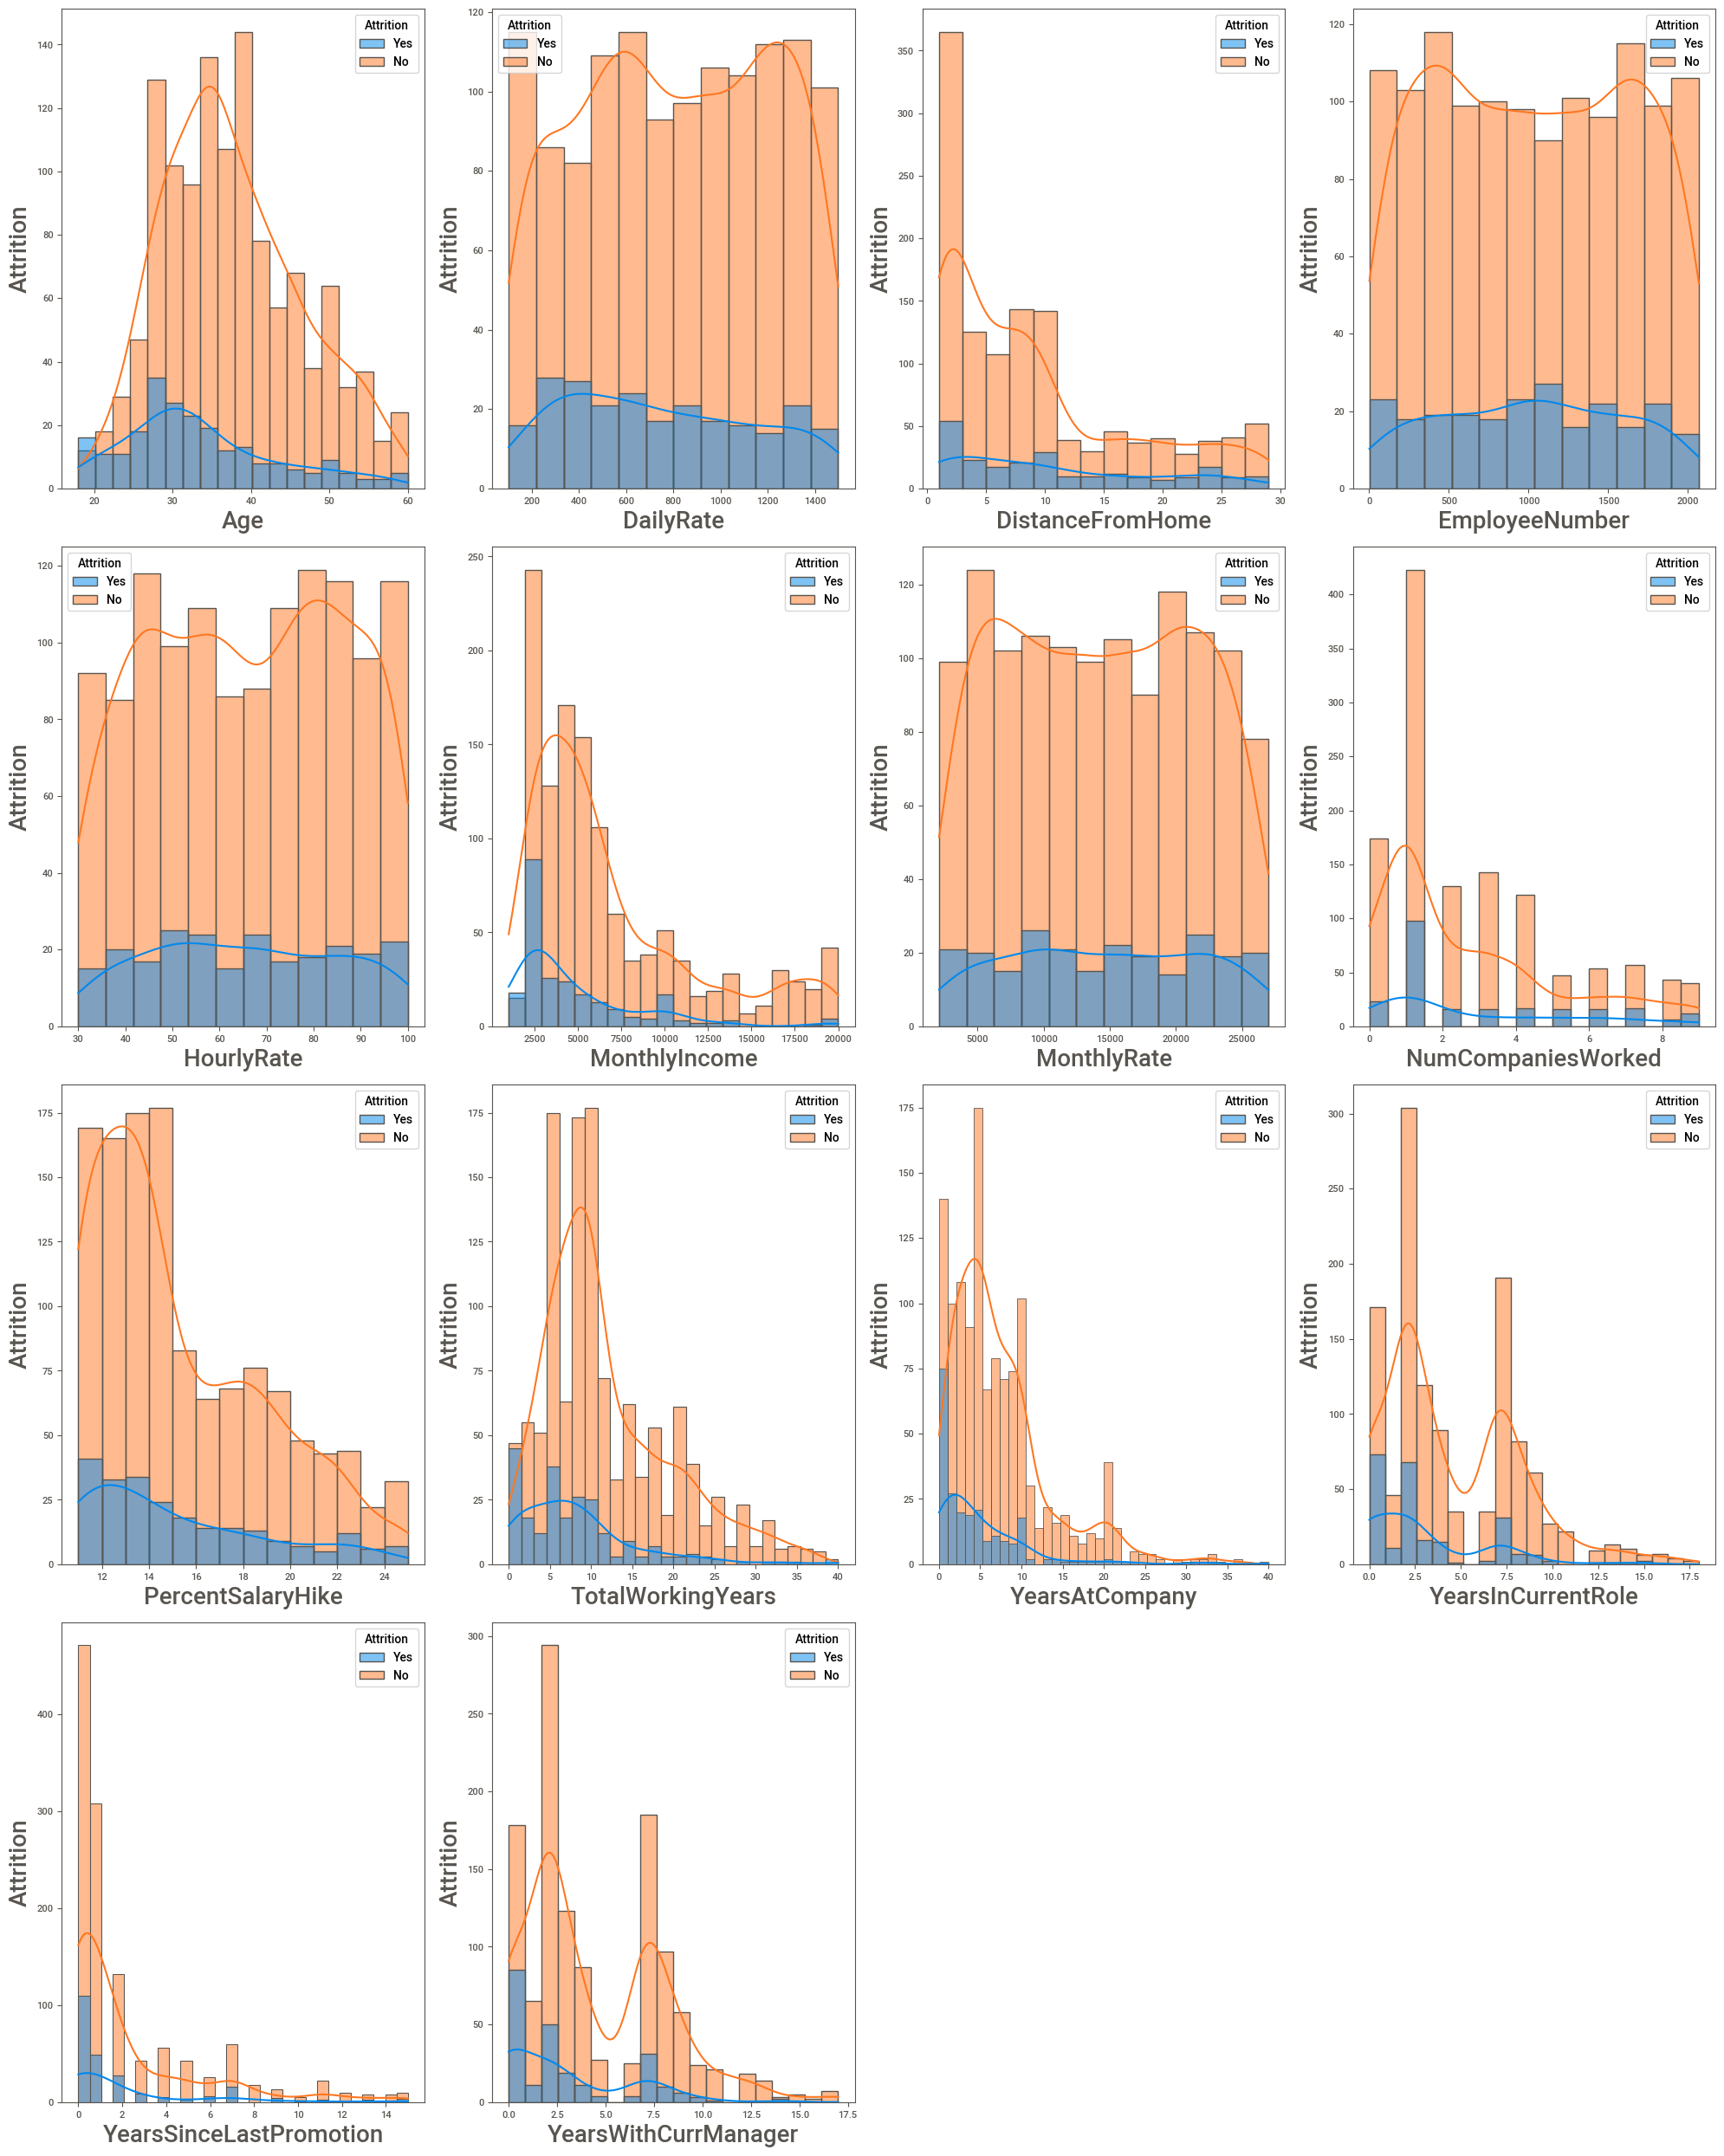

In [23]:
# Plotting how every  numerical feature correlate with the "target"
plt.figure(figsize=(20,25), facecolor='white')#canvas size
plotnumber = 1#counter for number of plot

for column in data2:#acessing columns form data2 DataFrame
    if plotnumber<=16 :#checking whether counter is less than 16 or not
        ax = plt.subplot(4,4,plotnumber)#plotting 8 graphs in canvas(4 rows and 4 columns)
        sns.histplot(x=data2[column]          # plotting hist plot and dropping null values,classification according to target
                        ,hue=df.Attrition,kde=True)
        plt.xlabel(column,fontsize=20)##assigning name to x-axis and increasing it's font
        plt.ylabel('Attrition',fontsize=20)#assigning name to y-axis and increasing it's font
    plotnumber+=1#increasing counter by 1
plt.tight_layout()

## Final conclusions:
BusinessTravel : The workers who travel alot are more likely to quit then other employees.

Department : The worker in Research & Development are more likely to stay then the workers on other departement.

EducationField : The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.

Gender : The Male are more likely to quit.

JobRole : The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.

MaritalStatus : The workers who have Single marital status are more likely to quit the Married, and Divorced.

OverTime : Attrition rate is almost equal

# **5. Data Preprocessing**

# 5.1 Data Cleaning

In [24]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [25]:
df.drop(columns=['Over18'], inplace=True)

In [26]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [27]:
# checking for null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [28]:
# Duplicated values
df.duplicated().sum()

0

# 5.2 Split Data Into X and y:

In [29]:
# split data into X and y

X = df.drop('Attrition',axis=1)
y = df.Attrition

In [30]:
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import SelectKBest,chi2

from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor

from imblearn.over_sampling import SMOTE

In [31]:
# training data and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
pd.set_option('display.max_columns',None)

In [33]:
X_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1097,24,Travel_Rarely,350,Research & Development,21,2,Technical Degree,1,1551,3,Male,57,2,1,Laboratory Technician,1,Divorced,2296,10036,0,No,14,3,2,80,3,2,3,3,1,1,0,0
727,18,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,13493,1,No,15,3,4,80,0,0,2,3,0,0,0,0
254,29,Travel_Rarely,1247,Sales,20,2,Marketing,1,349,4,Male,45,3,2,Sales Executive,4,Divorced,6931,10732,2,No,14,3,4,80,1,10,2,3,3,2,0,2
1175,39,Travel_Rarely,492,Research & Development,12,3,Medical,1,1654,4,Male,66,3,2,Manufacturing Director,2,Married,5295,7693,4,No,21,4,3,80,0,7,3,3,5,4,1,0
1341,31,Travel_Rarely,311,Research & Development,20,3,Life Sciences,1,1881,2,Male,89,3,2,Laboratory Technician,3,Divorced,4197,18624,1,No,11,3,1,80,1,10,2,3,10,8,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,35,Travel_Rarely,750,Research & Development,28,3,Life Sciences,1,1596,2,Male,46,4,2,Laboratory Technician,3,Married,3407,25348,1,No,17,3,4,80,2,10,3,2,10,9,6,8
1294,41,Travel_Rarely,447,Research & Development,5,3,Life Sciences,1,1814,2,Male,85,4,2,Healthcare Representative,2,Single,6870,15530,3,No,12,3,1,80,0,11,3,1,3,2,1,2
860,22,Travel_Frequently,1256,Research & Development,3,4,Life Sciences,1,1203,3,Male,48,2,1,Research Scientist,4,Married,2853,4223,0,Yes,11,3,2,80,1,1,5,3,0,0,0,0
1459,29,Travel_Rarely,1378,Research & Development,13,2,Other,1,2053,4,Male,46,2,2,Laboratory Technician,2,Married,4025,23679,4,Yes,13,3,1,80,1,10,2,3,4,3,0,3


In [34]:
# Encoding the target column "Attrition"
y_train = y_train.map({'Yes': 1, 'No': 0})
y_test = y_test.map({'Yes': 1, 'No': 0})

In [35]:
y_train

1097    0
727     0
254     0
1175    0
1341    0
       ..
1130    0
1294    0
860     1
1459    0
1126    0
Name: Attrition, Length: 1176, dtype: int64

In [36]:
X_train['OverTime'].value_counts()

No     837
Yes    339
Name: OverTime, dtype: int64

In [37]:
from sklearn.preprocessing import MaxAbsScaler

encoder = OneHotEncoder() # Replace with your desired encoder

In [38]:
X_train_encoded = encoder.fit_transform(X_train)  # Perform encoding
X_train_dense = X_train_encoded.toarray()        # Convert to dense array

# Define the pipeline using the dense array
pipe = Pipeline([
    ('preprocessing', encoder),
    ('scaling',  MaxAbsScaler()),  # Use MaxAbsScaler for sparse data
    ('feature_selection', SelectKBest(score_func=chi2, k=15)),
])

pipe.fit(X_train_dense, y_train)  # Fit using dense array

Pipeline(steps=[('preprocessing', OneHotEncoder()), ('scaling', MaxAbsScaler()),
                ('feature_selection',
                 SelectKBest(k=15,
                             score_func=<function chi2 at 0x000001A74402BEE0>))])

In [39]:
# Define the pipeline
pipe = Pipeline([
    ('preprocessing', encoder),  # Assuming `encoder` is your previously defined encoder
    ('scaling', MaxAbsScaler()),  # Use MaxAbsScaler for sparse data
    ('feature_selection', SelectKBest(score_func=chi2, k=15)),  # Feature selection step
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', OneHotEncoder()), ('scaling', MaxAbsScaler()),
                ('feature_selection',
                 SelectKBest(k=15,
                             score_func=<function chi2 at 0x000001A74402BEE0>))])

In [40]:
# column transformer for encoding categorical columns

encoder = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(), ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'OverTime']),  # Ordinal encoding
        ('ohe', OneHotEncoder(drop='first', sparse=F), ['Gender', 'MaritalStatus']),  # One-hot encoding with drop_first=True for 'Gender'
    ],
    remainder='passthrough'  # Keep the other columns unchanged
)

# setting to get a pandas df
encoder.set_output(transform='pandas')

TypeError: __init__() got an unexpected keyword argument 'sparse'

In [ ]:
import sklearn
print(sklearn.__version__)

In [ ]:
# Transform both the training and testing data
X_train_transformed = pd.DataFrame(pipe.transform(X_train))
X_test_transformed = pd.DataFrame(pipe.transform(X_test))

In [ ]:
X_train_transformed

In [ ]:
sm = SMOTE()
x_smote, y_smote = sm.fit_resample(X_train_transformed, y_train)

In [ ]:
y_smote.value_counts()

# **6. Model Building**

# 6.1 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,classification_report,f1_score

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_smote, y_smote)

# prediction with x_test
y_pred=model.predict(X_test_transformed)
#prediction with x_train
y_train_predict=model.predict(X_train_transformed)

In [ ]:
# training accuracy
accuracy_score(y_train,y_train_predict)

In [ ]:
# testing accuracy
accuracy_score(y_test,y_pred)

* we see that Model is overfitting beacause training score is high and testing score is less.
* To overcome overfitting we do hyperparmeter tunning

# Hyper-parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 20)),
}

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(x_smote,y_smote)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

In [ ]:
tree_cv.best_score_

In [ ]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=14,min_samples_leaf= 1,min_samples_split=2,splitter='random')
model.fit(x_smote,y_smote)#training the model
y_pred=model.predict(X_test_transformed)#prediction
y_pred#predicted values

In [ ]:
y_train_predict=model.predict(x_smote)#predicting training data to check training performance
y_train_predict

In [ ]:
# Training score
accuracy_score(y_smote,y_train_predict)